In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [38]:
os.chdir(r'C:\Users\Muhammed\Downloads')
dataset = pd.read_csv('naiveBayes.csv')
print(dataset)

     KullaniciID Cinsiyet  Yas  TahminiMaas  SatinAldiMi
0       15624510    Erkek   19        19000            0
1       15810944    Erkek   35        20000            0
2       15668575    Kadın   26        43000            0
3       15603246    Kadın   27        57000            0
4       15804002    Erkek   19        76000            0
..           ...      ...  ...          ...          ...
395     15691863    Kadın   46        41000            1
396     15706071    Erkek   51        23000            1
397     15654296    Kadın   50        20000            1
398     15755018    Erkek   36        33000            0
399     15594041    Kadın   49        36000            1

[400 rows x 5 columns]


In [39]:
#Bağımlı değişkenlerimizi belirliyoruz.
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

X_df = pd.DataFrame(X, columns=['Yaş', 'Maaş'])
y_df = pd.DataFrame(y, columns=['SatinAldiMi'])

combined_df = pd.concat([X_df, y_df], axis=1)
print(combined_df)




     Yaş   Maaş  SatinAldiMi
0     19  19000            0
1     35  20000            0
2     26  43000            0
3     27  57000            0
4     19  76000            0
..   ...    ...          ...
395   46  41000            1
396   51  23000            1
397   50  20000            1
398   36  33000            0
399   49  36000            1

[400 rows x 3 columns]


In [40]:
#Modelimizi eğitiyoruz.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [41]:
#Veri setindeki değerlerin ölçeklerini normalleştirerek, modelin daha iyi performans göstermesini sağlıyoruz.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [42]:
#Gaussian Naive Bayes sınıflandırıcısını kullanarak bir model oluşturup eğitiyoruz.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
#Test verisi üzerinde tahminler yapıyoruz.
y_pred = classifier.predict(X_test)

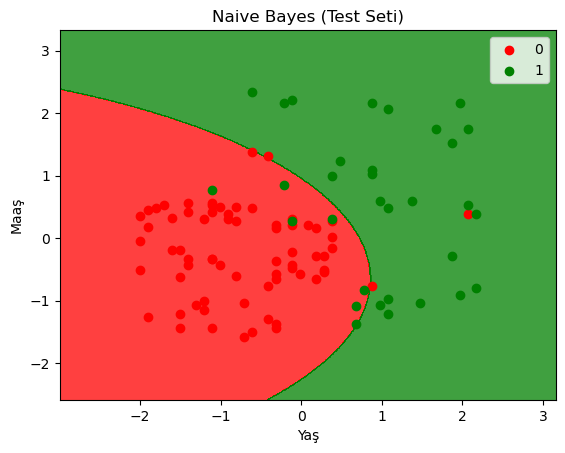

In [44]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

# Sınıf etiketlerini renklere dönüştürmek için ListedColormap kullanma
colors = ListedColormap(('red', 'green'))

# X1 ve X2'yi oluşturma
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Kontur çizimi
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=colors)

# Test setini gösterme
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Test Seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()




In [45]:
from sklearn.metrics import accuracy_score
# Modelin doğruluğunu hesaplıyoruz.
dogruluk = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {int(dogruluk * 100)}%")

Doğruluk: 90%
